In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def load_data(mode='train'):
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
    if (mode=='train'):
        x_train,y_train,x_valid,y_valid = mnist.train.images,mnist.train.labels,mnist.validation.images,mnist.validation.labels
        return x_train,y_train,x_valid,y_valid
    else:
        x_test,y_test = mnist.test.images,mnist.test.labels
        return x_test,y_test

In [4]:
x_train,y_train,x_valid,y_valid=load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [16]:
lr=0.001
epochs=10
batch_size=100
display_freq=100

img_h=img_w=28
img_flat = img_h*img_w
n_classes=10
#number of units in the hidden layer 
h1 = 200

In [17]:
def weight_variable(name, shape):
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W_' + name,
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)



def bias_variable(name, shape):
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b_' + name,
                           dtype=tf.float32,
                           initializer=initial)

def fc_layer(x,num_nodes,name,use_relu=True):
    in_dim = x.get_shape()[1]
    W=weight_variable(name,shape=[in_dim,num_nodes])
    b=bias_variable(name,[num_nodes])
    layer=tf.matmul(x,W)
    layer+=b
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer
def next_batch(x,y,start,end):
    return x[start:end],y[start:end]

# Creating the Graph

In [12]:
x = tf.placeholder(tf.float32,shape=[None,img_flat],name='X')
y = tf.placeholder(tf.float32,shape=[None,n_classes],name='Y')
fc1 = fc_layer(x,h1,'FC1',use_relu=True)
output_logits = fc_layer(fc1,n_classes,'OUT',use_relu=False)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=output_logits),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=lr,name='Adam-op').minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_logits,1),tf.argmax(y,1),name='correct_prediction')
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32),name='accuracy')

cls_prediction = tf.argmax(output_logits,axis=1,name='predictions')

init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [19]:
sess= tf.InteractiveSession()
sess.run(init)

num_iter = int(y_train.shape[0]/ batch_size)
for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch+1))
    for iteration in range(num_iter):
        batch_x,batch_y = next_batch(x_train,y_train,batch_size*iteration,(batch_size+1)*iteration)
        feed_dict_batch = {x:batch_x,y:batch_y}
        sess.run(optimizer,feed_dict=feed_dict_batch)
        
        if iteration % display_freq == 0:
            # Calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy],
                                             feed_dict=feed_dict_batch)
            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # Run validation after every epoch
    feed_dict_valid = {x: x_valid, y: y_valid}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')
        

C:\Users\abhat\AppData\Local\Continuum\miniconda3\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training epoch: 1
iter   0:	 Loss=nan,	Training Accuracy=nan%
iter 100:	 Loss=0.44,	Training Accuracy=91.0%
iter 200:	 Loss=0.29,	Training Accuracy=92.5%
iter 300:	 Loss=0.26,	Training Accuracy=93.7%
iter 400:	 Loss=0.24,	Training Accuracy=92.8%
iter 500:	 Loss=0.18,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.22, validation accuracy: 93.8%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=nan,	Training Accuracy=nan%
iter 100:	 Loss=0.18,	Training Accuracy=96.0%
iter 200:	 Loss=0.13,	Training Accuracy=96.5%
iter 300:	 Loss=0.17,	Training Accuracy=95.0%
iter 400:	 Loss=0.13,	Training Accuracy=95.7%
iter 500:	 Loss=0.12,	Training Accuracy=96.4%
---------------------------------------------------------
Epoch: 2, validation loss: 0.15, validation accuracy: 95.7%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=nan,	Training Accuracy=nan%
it

# Testing the Model

In [20]:
def plot_images(images,cls_true,cls_pred=None,title=None):
    fig,axes = plt.subplots(3,3,figsize=(9,9))
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    img_h=img_w=np.sqrt(images.shape[-1]).astype(int)
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape((img_h,img_w)),cmap='binary')
        if(cls_pred is None):
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title="True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
        ax.set_title(ax_title)
        
        ax.set_xticks([])
        ax.set_yticks([])
    if title:
        plt.suptitle(title,size=20)
    plt.show()

def plot_example_errors(images,cls_true,cls_pred,title=None):
    incorrect = np.logical_not(np.equal(cls_pred,cls_true))
    incorrect_images=images[incorrect]
    
    cls_pred=cls_pred[incorrect]
    cls_true=cls_true[incorrect]
    
    plot_images(images=incorrect_images[0:9],cls_true=cls_true[0:9],cls_pred=cls_pred[0:9],title=title)
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
---------------------------------------------------------
Test loss: 0.09, test accuracy: 97.4%
---------------------------------------------------------


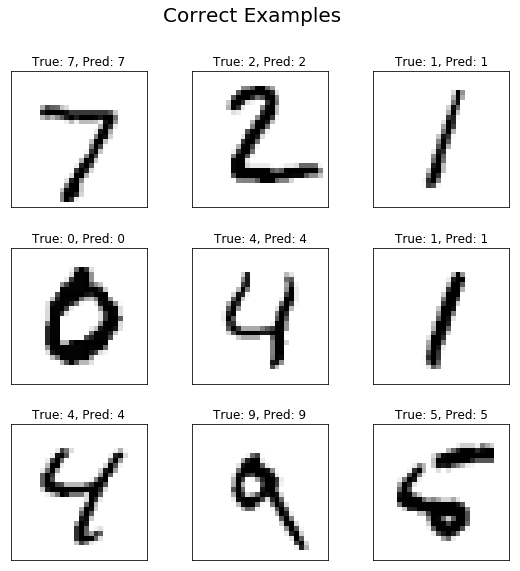

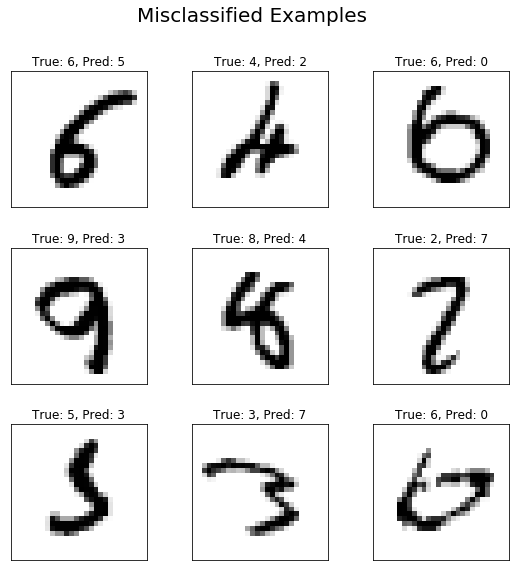

In [23]:
x_test,y_test=load_data(mode='test')
feed_dict_test = {x: x_test,y:y_test}
loss_test,acc_test = sess.run([loss,accuracy],feed_dict=feed_dict_test)

print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

# Plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test, axis=1)
plot_images(x_test, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(x_test, cls_true, cls_pred, title='Misclassified Examples')